In [9]:
import tensorflow as tf
from time import time
import sys
import os
import logging
import numpy as np
import pickle
import torch
from torch.utils.data import Dataset
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


In [15]:
batch_size=10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

trainset = datasets.MNIST(root='./data', train=True,download=True, transform = transform)

testset = datasets.MNIST(root='./data', train=False,download=True, transform = transform)

fullset =torch.utils.data.ConcatDataset((trainset, testset))

trainloader = torch.utils.data.DataLoader(fullset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)



classes= ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

(3, 62, 242)


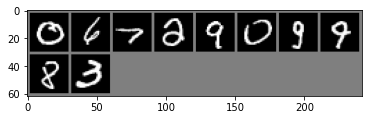

0     6     7     2     9     0     9     9     8     3    


In [16]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2+0.5 #converting
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
grid = torchvision.utils.make_grid(images)
imshow(grid)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 10, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x=torch.flatten(x, 1)
        x=F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

net.to(device)

cpu


Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)